<a href="https://colab.research.google.com/github/LutfiQadri/Prediksi-Curah-Hujan/blob/main/Source_Code_TA_Percobaan_1%20jam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input Data

In [4]:
import pandas as pd

data = pd.read_csv('Weather Data.csv')
data

,Tanggal/Waktu,Wind Direction,Wind Speed,BarometricPressure,Temperature,Humidity,Rain fall
0,2021-02-10 23:59:12 +08,0,0.00000,1007.70001,26.11111,96,0.0
1,2021-02-11 00:04:29 +08,45,0.00000,1007.50000,26.11111,95,0.0
2,2021-02-11 00:09:45 +08,45,0.44704,1007.40002,26.11111,95,0.0
3,2021-02-11 00:15:06 +08,45,0.44704,1007.29999,25.55556,95,0.0
4,2021-02-11 00:20:38 +08,0,0.44704,1007.40002,25.55556,96,0.0
...,...,...,...,...,...,...,...
15998,2021-04-11T23:38:12+08:00,0,0.89408,1009.79999,24.44444,99,0.0
15999,2021-04-11T23:43:23+08:00,45,0.44704,1009.70001,24.44444,99,0.0
16000,2021-04-11T23:48:35+08:00,45,0.44704,1009.70001,24.44444,99,0.0
16001,2021-04-11T23:53:49+08:00,0,0.00000,1009.70001,24.44444,99,0.0


In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

# Preprocessing


a. Uji Korelasi
---


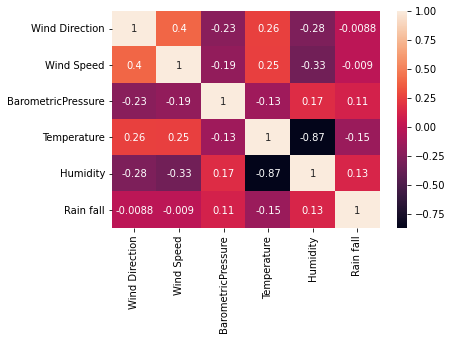

In [6]:
import seaborn as sns

DataCorr = data.corr()
sns.heatmap(DataCorr, annot=True)


b. Cleaning Data
---
1. Identifikasi Data Duplikat


In [7]:
data["Tanggal/Waktu"].duplicated().sum()

0

2. Identifikasi Missing Value

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16003 entries, 0 to 16002
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tanggal/Waktu       16003 non-null  object 
 1   Wind Direction      16003 non-null  int64  
 2   Wind Speed          16003 non-null  float64
 3   BarometricPressure  16003 non-null  float64
 4   Temperature         16003 non-null  float64
 5   Humidity            16003 non-null  int64  
 6   Rain fall           16003 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 875.3+ KB


In [9]:
data.isnull().sum()

Tanggal/Waktu         0
Wind Direction        0
Wind Speed            0
BarometricPressure    0
Temperature           0
Humidity              0
Rain fall             0
dtype: int64

3. Identifikasi Data outliers

In [10]:
data.describe()

,Wind Direction,Wind Speed,BarometricPressure,Temperature,Humidity,Rain fall
count,16003.000000,16003.000000,16003.000000,16003.000000,16003.000000,16003.000000
mean,132.117728,1.160844,1007.021044,26.828570,91.098544,0.990496
std,118.955317,1.054723,2.358305,4.107076,12.938399,4.507508
min,0.000000,0.000000,1000.000000,21.200000,41.000000,0.000000
25%,45.000000,0.447040,1005.339553,23.888890,89.000000,0.000000
50%,45.000000,0.894080,1007.099980,25.000000,99.000000,0.000000
75%,270.000000,1.400000,1008.599980,28.650000,99.000000,0.000000
max,315.000000,12.517120,1099.400020,45.000000,100.000000,67.818000


In [11]:
import matplotlib.pyplot as plt

def plotvariable(df, ft):
    plt.figure(figsize=(16, 4))
    
    #histogram
    plt.subplot(1, 2, 1)
    plt.hist(df[ft], alpha=0.5)
    
    #boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(df[ft])
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


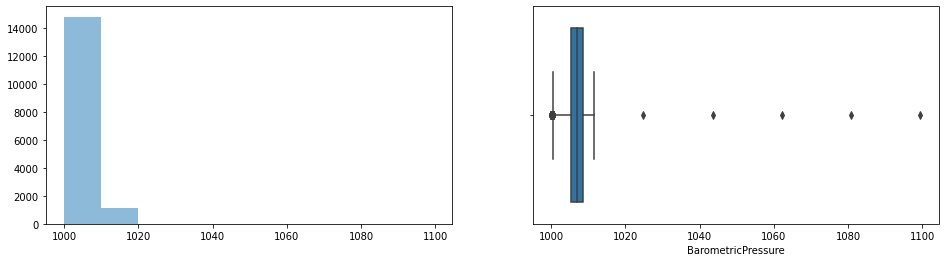

In [12]:
plotvariable(data, 'BarometricPressure')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


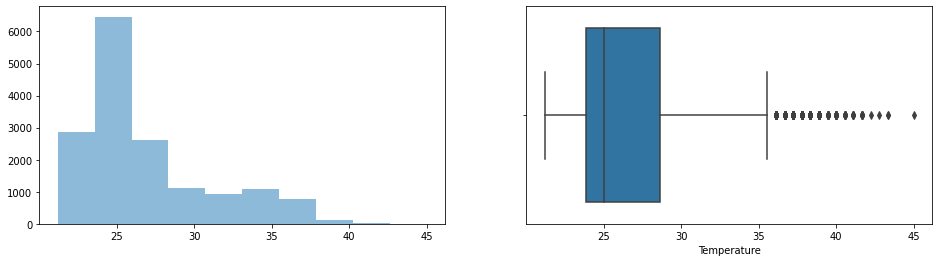

In [13]:
plotvariable(data, 'Temperature')

4. Hapus Data Outliers

In [14]:
# def outlier(data, feature):
#     Q1 = data[feature].quantile(0.25)
#     Q3 = data[feature].quantile(0.75)
#     IQR = Q3 - Q1

#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR

#     ls = data.index[ (data[feature] < lower_bound) | (data[feature] > upper_bound)]
#     return ls

In [15]:
# index_list = []
# for feature in ['BarometricPressure', 'Temperature']:
#     index_list.extend(outlier(data, feature))

In [16]:
# def remove(data, ls):
#     ls = sorted(set(ls))
#     data = data.drop(ls)
#     return data

# data_cleaned = remove(data, index_list)

In [17]:
# data['BarometricPressure'] = data['BarometricPressure'].fillna(data['BarometricPressure'].mean())
# data['Temperature'] = data['Temperature'].fillna(data['Temperature'].mean())

In [18]:
#data.to_csv('Hasil_Interpolasi.csv', index=False)

In [19]:
#data.isnull().sum()

In [20]:
#plotvariable(data_cleaned, 'BarometricPressure')

In [21]:
#plotvariable(data_cleaned, 'Temperature')

In [22]:
#jumlah keseluruhan data setelah cleaning data
#data_cleaned.shape


c. Normalisasi Data
---



In [23]:
#penentuan variabel independent dan dependent
prediktor = data[['Wind Direction', 'Wind Speed', 'BarometricPressure', 'Temperature', 'Humidity']]
print(prediktor)
target = data['Rain fall'].values.reshape(-1, 1)
print(target)

       Wind Direction  Wind Speed  BarometricPressure  Temperature  Humidity
0                   0     0.00000          1007.70001     26.11111        96
1                  45     0.00000          1007.50000     26.11111        95
2                  45     0.44704          1007.40002     26.11111        95
3                  45     0.44704          1007.29999     25.55556        95
4                   0     0.44704          1007.40002     25.55556        96
...               ...         ...                 ...          ...       ...
15998               0     0.89408          1009.79999     24.44444        99
15999              45     0.44704          1009.70001     24.44444        99
16000              45     0.44704          1009.70001     24.44444        99
16001               0     0.00000          1009.70001     24.44444        99
16002               0     0.00000          1009.59998     24.44444        99

[16003 rows x 5 columns]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [24]:
from sklearn.preprocessing import MinMaxScaler

#normalisasi data
scaler=MinMaxScaler()
scaler.fit(prediktor)
X = scaler.transform(prediktor)
print("Normalisasi variabel prediktor :")
print(X)

scaler1 = MinMaxScaler()
scaler1.fit(target)
y = scaler1.transform(target)
print("Normalisasi variabel target :")
print(y)

Normalisasi variabel prediktor :
[[0.         0.         0.07746487 0.20634916 0.93220339]
 [0.14285714 0.         0.0754527  0.20634916 0.91525424]
 [0.14285714 0.03571429 0.07444687 0.20634916 0.91525424]
 ...
 [0.14285714 0.03571429 0.09758559 0.13632101 0.98305085]
 [0.         0.         0.09758559 0.13632101 0.98305085]
 [0.         0.         0.09657926 0.13632101 0.98305085]]
Normalisasi variabel target :
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]


In [25]:
X = pd.DataFrame(X)
X.to_csv('X.csv', index=False)



d. Pembagian Data Latih dan Uji
---



In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42, shuffle=False)
print("Jumlah data training :")
print(X_train.shape, y_train.shape)
print("Jumlah data testing :")
print(X_test.shape, y_test.shape)

Jumlah data training :
(13602, 5) (13602, 1)
Jumlah data testing :
(2401, 5) (2401, 1)


# Pembuatan Model SVR tanpa tuning

In [27]:
from sklearn.svm import SVR

#pembuatan model dengan data latih
model = SVR()
model.fit(X_train, y_train.ravel())

SVR()

In [28]:
print(model.intercept_)

[0.09183054]



Prediksi dan Evaluasi Data Latih
---



In [29]:
#Prediksi data latih
y_pred_train = model.predict(X_train)
y_pred_train.reshape(-1, 1)
y_pred_train = pd.DataFrame(y_pred_train)
y_pred_train

,0
0,0.099716
1,0.099180
2,0.099155
3,0.099069
4,0.099636
...,...
13597,0.086946
13598,0.085483
13599,0.088264
13600,0.085555


In [30]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE:", mean_absolute_error(y_train, y_pred_train))

MSE: 0.011248727403066892
RMSE: 0.10606001792884485
MAE: 0.09483007154673063



Prediksi dan Evaluasi Data Uji
---



In [31]:
#Prediksi data uji
y_pred_test = model.predict(X_test)
y_pred_test.reshape(-1, 1)
y_pred_test = pd.DataFrame(y_pred_test)
y_pred_test

,0
0,0.086313
1,0.081361
2,0.081843
3,0.080287
4,0.080434
...,...
2396,0.099790
2397,0.099888
2398,0.099888
2399,0.100140


In [32]:
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("MAE:", mean_absolute_error(y_test, y_pred_test))

MSE: 0.008741117813547932
RMSE: 0.09349394533095676
MAE: 0.0930006345592623


# Tuning Hyperparameter

Pembuatan Model SVR dengan Grid Search

In [33]:
from os import error
from sklearn.model_selection import GridSearchCV

parameters = {
               'kernel':['rbf'],
               'C':[1, 5, 10, 100],
               'gamma':[0.1, 0.5, 1],
               'epsilon' :[0.01, 0.025, 0.05]
               #'degree' : [3],
               #'coef0' : [0] 
                }

model_grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, verbose=1)
model_grid_search.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [1, 5, 10, 100], 'epsilon': [0.01, 0.025, 0.05],
                         'gamma': [0.1, 0.5, 1], 'kernel': ['rbf']},
             verbose=1)

In [34]:
#memanggil parameter terbaik
print('param_terbaik adalah = ',model_grid_search.best_params_)

param_terbaik adalah =  {'C': 5, 'epsilon': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}


In [35]:
pd.DataFrame(model_grid_search.cv_results_).sort_values("rank_test_score")
#x.to_csv('poly.csv', index=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_epsilon,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
9,3.790651,0.475850,0.719161,0.072855,5,0.01,0.1,rbf,"{'C': 5, 'epsilon': 0.01, 'gamma': 0.1, 'kerne...",-0.009453,-0.060172,-0.017290,-2.029889,-0.246025,-0.472566,0.783377,1
18,4.636175,0.555167,0.718654,0.076233,10,0.01,0.1,rbf,"{'C': 10, 'epsilon': 0.01, 'gamma': 0.1, 'kern...",-0.009201,-0.059990,-0.017012,-2.031071,-0.300885,-0.483632,0.781058,2
0,3.253470,0.362067,0.718461,0.085599,1,0.01,0.1,rbf,"{'C': 1, 'epsilon': 0.01, 'gamma': 0.1, 'kerne...",-0.009662,-0.060368,-0.018219,-2.177831,-0.212439,-0.495704,0.844220,3
1,3.765719,0.449203,0.710728,0.076766,1,0.01,0.5,rbf,"{'C': 1, 'epsilon': 0.01, 'gamma': 0.5, 'kerne...",-0.008802,-0.060089,-0.015440,-2.173281,-0.556388,-0.562800,0.831014,4
2,4.138757,0.630512,0.736060,0.091591,1,0.01,1,rbf,"{'C': 1, 'epsilon': 0.01, 'gamma': 1, 'kernel'...",-0.005557,-0.058803,-0.012172,-2.391762,-0.824118,-0.658482,0.920363,5
10,5.632571,0.636431,0.723203,0.074955,5,0.01,0.5,rbf,"{'C': 5, 'epsilon': 0.01, 'gamma': 0.5, 'kerne...",-0.006363,-0.059460,-0.013018,-2.659395,-0.726836,-0.693015,1.020105,6
19,7.653599,1.185355,0.724197,0.078790,10,0.01,0.5,rbf,"{'C': 10, 'epsilon': 0.01, 'gamma': 0.5, 'kern...",-0.005047,-0.058885,-0.010723,-3.062607,-0.942402,-0.815933,1.178351,7
11,6.952483,0.399122,0.752652,0.071090,5,0.01,1,rbf,"{'C': 5, 'epsilon': 0.01, 'gamma': 1, 'kernel'...",-0.004318,-0.058092,-0.007571,-2.739003,-1.331606,-0.828118,1.081653,8
27,14.119278,1.219066,0.721990,0.070547,100,0.01,0.1,rbf,"{'C': 100, 'epsilon': 0.01, 'gamma': 0.1, 'ker...",-0.008420,-0.059914,-0.014635,-3.589730,-0.553350,-0.845210,1.387396,9
20,10.453774,1.098042,0.745521,0.065052,10,0.01,1,rbf,"{'C': 10, 'epsilon': 0.01, 'gamma': 1, 'kernel...",-0.002596,-0.057732,-0.003566,-2.932779,-1.754129,-0.950160,1.197288,10


In [36]:
print('score =', model_grid_search.best_score_)

score = -0.47256560613165455


In [37]:
means = model_grid_search.cv_results_['mean_test_score']
stds = model_grid_search.cv_results_['std_test_score']

Prediksi dan Evaluasi Data Latih
---



In [38]:
y_pred_train1 = model_grid_search.predict(X_train)
y_pred_train1.reshape(-1, 1)
#y_pred_train1 = pd.DataFrame(y_pred_train1)
#y_pred_train1

array([[0.00991801],
       [0.00969766],
       [0.00964442],
       ...,
       [0.00889286],
       [0.00848709],
       [0.00866415]])

In [39]:
print("MSE:", mean_squared_error(y_train, y_pred_train1))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train1)))
print("MAE:", mean_absolute_error(y_train, y_pred_train1))

MSE: 0.0051793022033767505
RMSE: 0.07196736901802615
MAE: 0.023027718877774002



Prediksi dan Evaluasi Data Uji
---



In [40]:
y_pred_test1 = model_grid_search.predict(X_test)
y_pred_test1.reshape(-1, 1)
#y_pred_test1 = pd.DataFrame(y_pred_test1, columns=['Prediksi Test'])
#y_pred_test1

array([[0.00862023],
       [0.00783527],
       [0.00794104],
       ...,
       [0.00978151],
       [0.00983857],
       [0.00984185]])

In [41]:
print("MSE:", mean_squared_error(y_test, y_pred_test1))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test1)))
print("MAE:", mean_absolute_error(y_test, y_pred_test1))

MSE: 0.00012523291562876695
RMSE: 0.011190751343353445
MAE: 0.010044702126440397


# Denormalisasi

In [42]:
# denormalisasi data testing
# mengembalikan ke skala asli
prediksi_asli = scaler1.inverse_transform(y_pred_test1.reshape(-1,1))
aktual_asli = scaler1.inverse_transform(y_test.reshape(-1,1))

In [43]:
# dalam bentuk pandas.DataFrame
diff_table = pd.DataFrame(dict(predict=prediksi_asli.flatten(),
                               truth=aktual_asli.flatten(),
                              ))
diff_table['diff'] = (diff_table.predict - diff_table.truth).abs()
diff_table

,predict,truth,diff
0,0.584607,0.0,0.584607
1,0.531372,0.0,0.531372
2,0.538545,0.0,0.538545
3,0.520115,0.0,0.520115
4,0.521197,0.0,0.521197
...,...,...,...
2396,0.664779,0.0,0.664779
2397,0.663362,0.0,0.663362
2398,0.663362,0.0,0.663362
2399,0.667232,0.0,0.667232


# Visualisasi

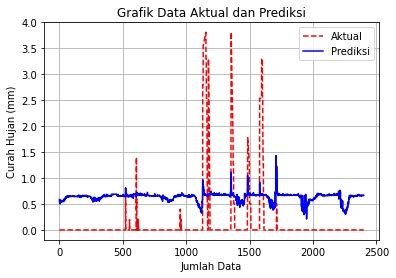

In [44]:
plt.plot(aktual_asli, 'r--', label='Aktual')
plt.plot(prediksi_asli, 'b', label='Prediksi')
plt.grid(True)
plt.xlabel('Jumlah Data')
plt.ylabel('Curah Hujan (mm)')
plt.title('Grafik Data Aktual dan Prediksi')
plt.legend()
plt.show()

In [99]:
model_baru = SVR(kernel="rbf", epsilon=0.01, C=5, gamma=0.1)
model_baru.fit(y_test, y_pred_test1.ravel())

SVR(C=5, epsilon=0.01, gamma=0.1)

In [100]:
#print(model_baru.intercept_)

# Uji Coba Model Dengan Data Baru

In [101]:
data1 = pd.read_csv('Skenario 1.csv')
data1

,Tanggal/Waktu,Wind Direction,Wind Speed,BarometricPressure,Temperature,Humidity,Rain fall
0,2022-04-01T19:58:13+08:00,45,0.44704,1005.79999,23.33333,99,0
1,2022-04-01T20:03:32+08:00,45,0.00000,1005.90002,23.33333,99,0
2,2022-04-01T20:08:51+08:00,45,0.00000,1005.90002,23.88889,99,0
3,2022-04-01T20:14:09+08:00,0,0.00000,1006.00000,23.88889,99,0
4,2022-04-01T20:19:27+08:00,0,0.00000,1006.00000,23.88889,99,0
...,...,...,...,...,...,...,...
495,2022-04-04T03:54:28+08:00,45,0.89408,1005.00000,23.88889,99,0
496,2022-04-04T03:59:45+08:00,45,0.89408,1005.00000,23.88889,99,0
497,2022-04-04T04:05:03+08:00,45,0.44704,1005.00000,23.33333,99,0
498,2022-04-04T04:10:21+08:00,45,0.44704,1004.90002,23.33333,99,0


In [102]:
prediktor = data1[['Wind Direction', 'Wind Speed', 'BarometricPressure', 'Temperature', 'Humidity']]
print(prediktor)

     Wind Direction  Wind Speed  BarometricPressure  Temperature  Humidity
0                45     0.44704          1005.79999     23.33333        99
1                45     0.00000          1005.90002     23.33333        99
2                45     0.00000          1005.90002     23.88889        99
3                 0     0.00000          1006.00000     23.88889        99
4                 0     0.00000          1006.00000     23.88889        99
..              ...         ...                 ...          ...       ...
495              45     0.89408          1005.00000     23.88889        99
496              45     0.89408          1005.00000     23.88889        99
497              45     0.44704          1005.00000     23.33333        99
498              45     0.44704          1004.90002     23.33333        99
499              45     0.44704          1005.00000     23.33333        99

[500 rows x 5 columns]


In [103]:
target = data1['Rain fall'].values.reshape(-1, 1)
print(target)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [104]:
#normalisasi data
scaler=MinMaxScaler()
scaler.fit(prediktor)
X = scaler.transform(prediktor)
print("Normalisasi variabel prediktor :")
print(X)

Normalisasi variabel prediktor :
[[0.14285714 0.08333333 0.65956881 0.03703667 1.        ]
 [0.14285714 0.         0.68085174 0.03703667 1.        ]
 [0.14285714 0.         0.68085174 0.074074   1.        ]
 ...
 [0.14285714 0.08333333 0.48935853 0.03703667 1.        ]
 [0.14285714 0.08333333 0.46808624 0.03703667 1.        ]
 [0.14285714 0.08333333 0.48935853 0.03703667 1.        ]]


In [105]:
scaler1 = MinMaxScaler()
scaler1.fit(target)
y = scaler1.transform(target)
print("Normalisasi variabel target :")
print(y)

Normalisasi variabel target :
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [106]:
#y = pd.DataFrame(y)
#y.to_csv('y.csv', index=False)


In [107]:
prediksi = model_grid_search.predict(X)
prediksi.reshape(-1, 1)
#prediksi = pd.DataFrame(prediksi)
prediksi

array([ 0.01142761,  0.00859252,  0.00824136,  0.00786115,  0.00786115,
        0.00795428,  0.00824136,  0.00815929,  0.00776554,  0.00766732,
        0.00735674,  0.00735674,  0.00724768,  0.0076122 ,  0.00751124,
        0.00740738,  0.00740738,  0.00730044,  0.01087565,  0.0070774 ,
        0.00719049,  0.00719049,  0.01090786,  0.01093609,  0.00702081,
        0.01009665,  0.01013147,  0.01090786,  0.00678197,  0.00690288,
        0.01027511,  0.01090786,  0.01163464,  0.01474016,  0.01023022,
        0.01087565,  0.01478531,  0.01469005,  0.01469005,  0.01093609,
        0.01096039,  0.01096039,  0.00751124,  0.01099755,  0.01099755,
        0.01595997,  0.01993571,  0.0160488 ,  0.01595997,  0.01595997,
        0.01506434,  0.01586644,  0.01975951,  0.01490283,  0.01490283,
        0.01481542,  0.0146278 ,  0.01145932,  0.01145932,  0.0146278 ,
        0.01147028,  0.01212959,  0.01074676,  0.01890904,  0.01357205,
        0.0142095 ,  0.0095129 ,  0.01102765,  0.01144506,  0.01

In [108]:
#prediksi = pd.DataFrame(prediksi)
#prediksi.to_csv('prediksi.csv', index=False)


In [109]:
print("MSE:", mean_squared_error(prediksi, y))

MSE: 0.00010280536550991964


In [110]:
#peramalan
#peramalan 1 periode berikutnya
X_1 = np.array([prediksi[-1]])
X_1 = X_1.reshape((1,1))
Y_1 = model_baru.predict(X_1)
print(Y_1)
#peramalan 2 periode berikutnya
X_2 = np.array([Y_1])
X_2 = X_2.reshape((1,1))
Y_2 = model_baru.predict(X_2)
print(Y_2)
#peramalan 3 periode berikutnya
X_3 = np.array([Y_2])
X_3 = X_3.reshape((1,1))
Y_3 = model_baru.predict(X_3)
print(Y_3)
#peramalan 4 periode berikutnya
X_4 = np.array([Y_3])
X_4 = X_4.reshape((1,1))
Y_4 = model_baru.predict(X_4)
print(Y_4)
#peramalan 5 periode berikutnya
X_5 = np.array([Y_4])
X_5 = X_5.reshape((1,1))
Y_5 = model_baru.predict(X_5)
print(Y_5)
#peramalan 6 periode berikutnya
X_6 = np.array([Y_5])
X_6 = X_6.reshape((1,1))
Y_6 = model_baru.predict(X_6)
print(Y_6)
#peramalan 7 periode berikutnya
X_7 = np.array([Y_6])
X_7 = X_7.reshape((1,1))
Y_7 = model_baru.predict(X_7)
print(Y_7)
#peramalan 8 periode berikutnya
X_8 = np.array([Y_7])
X_8 = X_8.reshape((1,1))
Y_8 = model_baru.predict(X_8)
print(Y_8)
#peramalan 9 periode berikutnya
X_9 = np.array([Y_8])
X_9 = X_9.reshape((1,1))
Y_9 = model_baru.predict(X_9)
print(Y_9)
#peramalan 10 periode berikutnya
X_10 = np.array([Y_9])
X_10 = X_10.reshape((1,1))
Y_10 = model_baru.predict(X_10)
print(Y_10)
#peramalan 11 periode berikutnya
X_11 = np.array([Y_10])
X_11 = X_11.reshape((1,1))
Y_11 = model_baru.predict(X_11)
print(Y_11)
#peramalan 12 periode berikutnya
X_12 = np.array([Y_11])
X_12 = X_12.reshape((1,1))
Y_12 = model_baru.predict(X_12)
print(Y_12)

[0.01212006]
[0.01212006]
[0.01212006]
[0.01212006]
[0.01212006]
[0.01212006]
[0.01212006]
[0.01212006]
[0.01212006]
[0.01212006]
[0.01212006]
[0.01212006]


In [111]:
Hasil = np.array([Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9,Y_10,Y_11,Y_12])
Hasil

array([[0.01212006],
       [0.01212006],
       [0.01212006],
       [0.01212006],
       [0.01212006],
       [0.01212006],
       [0.01212006],
       [0.01212006],
       [0.01212006],
       [0.01212006],
       [0.01212006],
       [0.01212006]])

In [112]:
data2 = pd.read_csv('Data Aktual 1 jam kedepan Skenario 1.csv')
data2

,Tanggal/Waktu,Wind Direction,Wind Speed,BarometricPressure,Temperature,Humidity,Rain fall
0,2022-04-04T04:20:57+08:00,0,0.44704,1004.90002,23.33333,99,0
1,2022-04-04T04:26:16+08:00,45,0.00000,1004.79999,23.33333,99,0
2,2022-04-04T04:31:34+08:00,45,0.00000,1004.79999,23.88889,99,0
3,2022-04-04T04:36:51+08:00,0,0.00000,1004.79999,23.33333,99,0
4,2022-04-04T04:42:09+08:00,45,0.00000,1004.79999,23.33333,99,0
5,2022-04-04T04:47:27+08:00,45,0.44704,1004.90002,23.88889,99,0
6,2022-04-04T04:52:46+08:00,90,0.89408,1004.90002,23.33333,99,0
7,2022-04-04T04:58:03+08:00,45,0.89408,1004.90002,23.33333,99,0
8,2022-04-04T05:03:21+08:00,45,0.89408,1004.90002,23.33333,99,0
9,2022-04-04T05:08:39+08:00,45,0.44704,1005.00000,23.33333,99,0


In [113]:
target = data2['Rain fall'].values.reshape(-1, 1)
print(target)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]]


In [114]:
scaler1 = MinMaxScaler()
scaler1.fit(target)
y = scaler1.transform(target)
print("Normalisasi variabel target :")
print(y)

Normalisasi variabel target :
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [115]:
print("MSE:", mean_squared_error(Hasil, y))

MSE: 0.00014689589412981264
